In [1]:
from keras.datasets import cifar10

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 31s 0us/step


In [3]:
import matplotlib.pyplot as plt

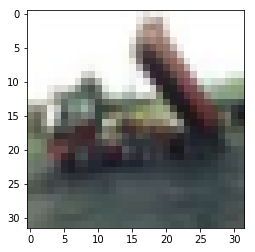

In [6]:
plt.imshow(X_train[2])

In [7]:
X_train = X_train / 255
X_test = X_test / 255

In [8]:
from keras.utils import to_categorical

In [9]:
y_categorical_train = to_categorical(y_train, 10)

y_categorical_test = to_categorical(y_test, 10)

In [10]:
from keras.models import Sequential
from keras.layers import Dense, MaxPool2D, Flatten, Conv2D

In [13]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4, 4), input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(4, 4), input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               205056    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total para

In [15]:
model.fit(X_train, y_categorical_train, verbose=1, epochs=10)

Epoch 1/10
28896/50000 [================>.............] - ETA: 2:46 - loss: 1.6633 - acc: 0.4007

KeyboardInterrupt: 

In [ ]:
model.evaluate(X_test, y_categorical_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
predictions = model.predict_classes(X_test)

In [ ]:
print(classification_report(y_test, predictions))